Logistics dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayeshaseherr/delivery-logistics-dataset")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/raj/.cache/kagglehub/datasets/ayeshaseherr/delivery-logistics-dataset/versions/1


In [2]:
csv_file = '/Users/raj/.cache/kagglehub/datasets/ayeshaseherr/delivery-logistics-dataset/versions/1/Delivery_Logistics.csv'

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
logi_df = pd.read_csv(csv_file)
logi_df.head(10)

,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delivery_time_hours,expected_time_hours,delayed,delivery_status,delivery_rating,delivery_cost
0,250.99,delhivery,automobile parts,bike,same day,west,clear,297.0,46.96,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000008,no,delivered,3,1632.7206
1,250.99,xpressbees,cosmetics,ev van,express,central,cold,89.6,47.39,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,no,delivered,5,640.1700
2,250.99,shadowfax,groceries,truck,two day,east,rainy,273.5,26.89,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000016,no,delivered,4,1448.1700
3,250.99,dhl,electronics,ev van,same day,east,cold,269.7,12.69,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,no,delivered,3,1486.5700
4,250.99,dhl,clothing,van,two day,north,foggy,256.7,37.02,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000016,no,delivered,4,1394.5600
5,250.99,amazon logistics,documents,ev bike,express,west,rainy,48.4,33.15,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000002,yes,delayed,3,391.4500
6,250.99,delhivery,groceries,scooter,same day,central,clear,198.3,43.79,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,no,delivered,3,1222.8700
7,250.99,xpressbees,fragile items,van,same day,north,cold,114.6,42.63,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000008,no,delivered,3,800.8900
8,250.99,blue dart,clothing,van,same day,south,hot,142.4,14.06,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000008,no,delivered,5,854.1800
9,250.99,delhivery,pharmacy,truck,same day,east,foggy,47.1,29.28,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000008,no,delivered,5,423.3400


1. delivery partner along with and delivery ratings and cost  
2. weather condition with devliery time hours and expected time hours and delayed  
3. package type and weight against delivery mode and vehicle type to get it delivered on time  
4. delivery mode against region and distance in km  
5. delay based on various other parameters (delivery partner, vehicle type, delivery mode, region, distance_km)  
6. for a delivery partner, what are delivery time hours and expected time hours  

1. delivery partner along with and delivery ratings and cost

In [5]:
logi_df.head(3)

,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delivery_time_hours,expected_time_hours,delayed,delivery_status,delivery_rating,delivery_cost
0,250.99,delhivery,automobile parts,bike,same day,west,clear,297.0,46.96,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000008,no,delivered,3,1632.7206
1,250.99,xpressbees,cosmetics,ev van,express,central,cold,89.6,47.39,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,no,delivered,5,640.1700
2,250.99,shadowfax,groceries,truck,two day,east,rainy,273.5,26.89,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000016,no,delivered,4,1448.1700


In [6]:
temp_df = logi_df[['delivery_partner','delivery_rating', 'delivery_status']]
temp_df['delivery_status'].value_counts()

delivery_status
delivered    18331
delayed       5341
failed        1328
Name: count, dtype: int64

In [7]:
temp = pd.crosstab(logi_df['delivery_partner'], logi_df['delivery_status'])
temp

delivery_status,delayed,delivered,failed
delivery_partner,,,
amazon logistics,585,1973,153
blue dart,592,2044,162
delhivery,552,2095,139
dhl,572,2064,166
ecom express,605,1997,120
ekart,614,2033,154
fedex,575,2109,134
shadowfax,614,1989,133
xpressbees,632,2027,167


<Axes: xlabel='delivery_partner'>

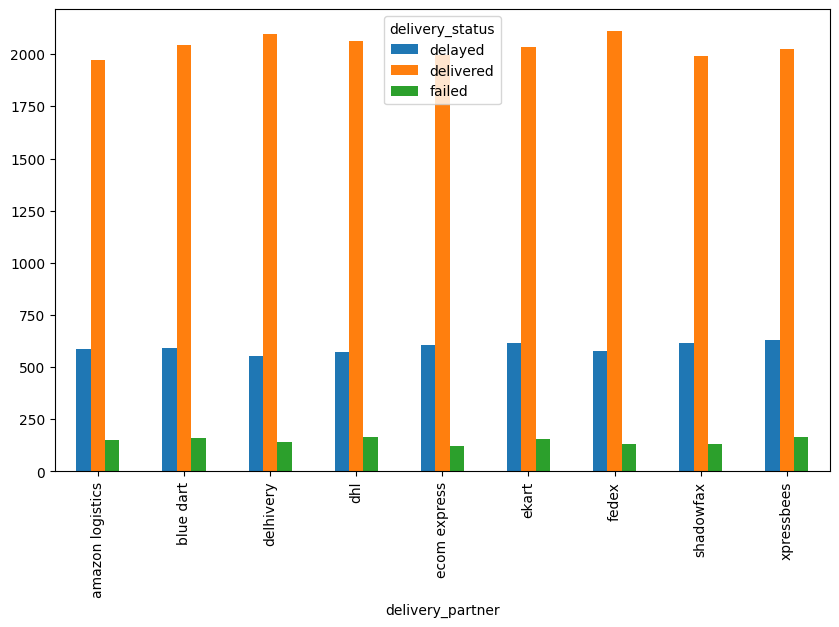

In [8]:
temp.plot(kind='bar', figsize=(10, 6))

In [9]:
ratings = temp_df.groupby('delivery_partner')['delivery_rating'].value_counts()
ratings = pd.crosstab(temp_df['delivery_partner'], temp_df['delivery_rating'])
ratings

delivery_rating,1,2,3,4,5
delivery_partner,,,,,
amazon logistics,105,394,639,795,778
blue dart,117,398,612,814,857
delhivery,102,381,639,827,837
dhl,109,376,640,840,837
ecom express,86,396,631,814,795
ekart,98,415,669,791,828
fedex,89,381,678,813,857
shadowfax,92,431,601,799,813
xpressbees,122,430,664,825,785


<Axes: xlabel='delivery_partner'>

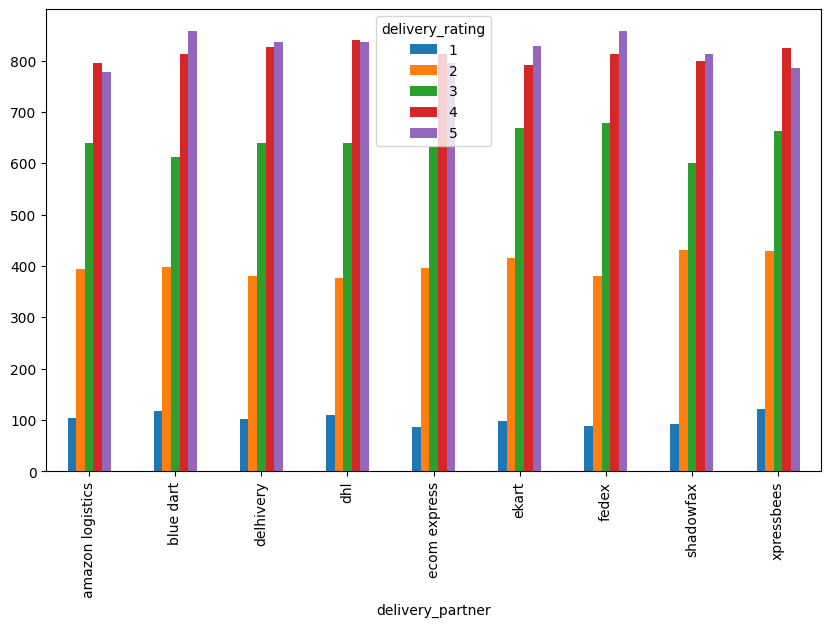

In [10]:
ratings.plot(kind='bar', figsize=(10, 6))

In [11]:
logi_df.head(2)

,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delivery_time_hours,expected_time_hours,delayed,delivery_status,delivery_rating,delivery_cost
0,250.99,delhivery,automobile parts,bike,same day,west,clear,297.0,46.96,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000008,no,delivered,3,1632.7206
1,250.99,xpressbees,cosmetics,ev van,express,central,cold,89.6,47.39,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,no,delivered,5,640.1700


/var/folders/cm/xbcw7tbj7ks0tkxmz2yy2pch0000gn/T/ipykernel_32754/3163079193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cost_per_km'] = temp_df['delivery_cost'] / temp_df['distance_km']
/var/folders/cm/xbcw7tbj7ks0tkxmz2yy2pch0000gn/T/ipykernel_32754/3163079193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cost_per_weight'] = temp_df['delivery_cost'] / temp_df['package_weight_kg']
/var/folders/cm/xbcw7tbj7ks0tkxmz2yy2pch0000gn/T/ipykernel_32754/3163079193.py:4: SettingWithCop

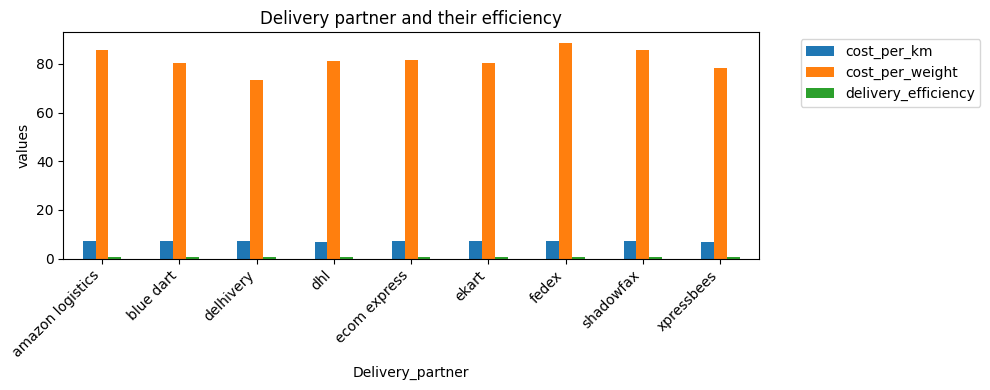

In [16]:
temp_df = logi_df[['delivery_partner','distance_km', 'package_weight_kg', 'delivery_cost']]
temp_df['cost_per_km'] = temp_df['delivery_cost'] / temp_df['distance_km']
temp_df['cost_per_weight'] = temp_df['delivery_cost'] / temp_df['package_weight_kg']
temp_df['delivery_efficiency'] = temp_df['delivery_cost'] / (temp_df['distance_km'] * temp_df['package_weight_kg'])
temp_df.drop(['distance_km', 'package_weight_kg', 'delivery_cost'], axis=1, inplace=True)
# temp_df.drop(['cost_per_km', 'cost_per_weight'], axis=1, inplace=True)
temp_df_grouped = temp_df.groupby('delivery_partner').mean()
temp_df_grouped.plot(kind='bar', figsize=(10, 4))
plt.xlabel('Delivery_partner')
plt.ylabel("values")
plt.title("Delivery partner and their efficiency")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [13]:
temp_df.head(5)

,delivery_partner,cost_per_km,cost_per_weight,delivery_efficiency
0,delhivery,5.497376,34.768326,0.117065
1,xpressbees,7.144754,13.508546,0.150765
2,shadowfax,5.294954,53.855337,0.196912
3,dhl,5.511939,117.144996,0.434353
4,dhl,5.432645,37.670448,0.146749


In [19]:
logi_df.head(50)

,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delivery_time_hours,expected_time_hours,delayed,delivery_status,delivery_rating,delivery_cost
0,250.99,delhivery,automobile parts,bike,same day,west,clear,297.0,46.96,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000008,no,delivered,3,1632.7206
1,250.99,xpressbees,cosmetics,ev van,express,central,cold,89.6,47.39,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,no,delivered,5,640.1700
2,250.99,shadowfax,groceries,truck,two day,east,rainy,273.5,26.89,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000016,no,delivered,4,1448.1700
3,250.99,dhl,electronics,ev van,same day,east,cold,269.7,12.69,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,no,delivered,3,1486.5700
4,250.99,dhl,clothing,van,two day,north,foggy,256.7,37.02,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000016,no,delivered,4,1394.5600
5,250.99,amazon logistics,documents,ev bike,express,west,rainy,48.4,33.15,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000002,yes,delayed,3,391.4500
6,250.99,delhivery,groceries,scooter,same day,central,clear,198.3,43.79,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,no,delivered,3,1222.8700
7,250.99,xpressbees,fragile items,van,same day,north,cold,114.6,42.63,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000008,no,delivered,3,800.8900
8,250.99,blue dart,clothing,van,same day,south,hot,142.4,14.06,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000008,no,delivered,5,854.1800
9,250.99,delhivery,pharmacy,truck,same day,east,foggy,47.1,29.28,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000008,no,delivered,5,423.3400


<Axes: xlabel='delivery_mode'>

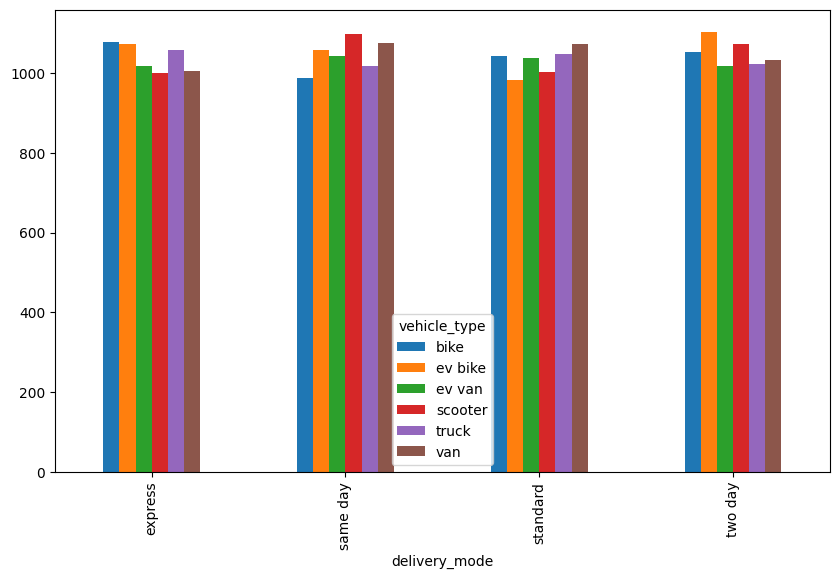

In [ ]:
temp_df = logi_df[['package_type', 'vehicle_type', 'delivery_mode']]
temp_df = pd.crosstab(temp_df['delivery_mode'], temp_df['vehicle_type'])
temp_df.plot(kind='bar', figsize=(10, 6))
